In [1]:
import h5py
import numpy as np
fh5 = h5py.File('E:/data/Survival/H5map/fmap/fmap_BLCA.h5','r')
img = fh5['map']
img = np.array(img)
print(img.shape)
lab = fh5['lab']
lab = np.array(lab)
print(lab.shape)

(191, 33, 33)
(191,)


In [2]:
img = img.reshape(len(img), 33, 33, 1)
imgs = img[:,9:24,9:24,:]

In [3]:
imgs.shape

(168, 15, 15, 1)

In [4]:
f = h5py.File('E:/data/Survival/GAN500sur_BLCA.h5', 'r')
img0 = f['img0']
img0 = np.array(img0)
print(img0.shape)
lab0 = f['lab0']
lab0 = np.array(lab0)
print(lab0.shape)
img1 = f['img1']
img1 = np.array(img1)
print(img1.shape)
lab1 = f['lab1']
lab1 = np.array(lab1)
print(lab1.shape)


(500, 33, 33, 1)
(500,)
(500, 33, 33, 1)
(500,)


In [5]:
Data_X_min, Data_X_max = np.min(img), np.max(img)
Data_X_mean = np.mean(img)  

In [6]:
def normalize(array):
    array = (array - Data_X_min) / (Data_X_max - Data_X_min)
    #array = (array - Data_X_mean) / (Data_X_max - Data_X_min)
    return array

In [7]:
img_n = normalize(img)

In [8]:
imgf = img.reshape(len(img), 33*33)

In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(imgf,lab,test_size=0.5,random_state=1)

In [10]:
from sklearn.ensemble import GradientBoostingClassifier

In [11]:
gbdt = GradientBoostingClassifier(n_estimators=35)

In [12]:
gbdt.fit(X_train,y_train) 

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=35,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [13]:
predict = gbdt.predict(X_test)

In [14]:
target_names = ['class 0', 'class 1']

In [15]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predict, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.45      0.44      0.44        41
     class 1       0.48      0.49      0.48        43

    accuracy                           0.46        84
   macro avg       0.46      0.46      0.46        84
weighted avg       0.46      0.46      0.46        84



In [16]:
from sklearn.svm import SVC
C =5
gamma = 0.1
svm= SVC(C=C,gamma=gamma)

In [17]:
svm.fit(X_train,y_train)

SVC(C=5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [18]:
predict = svm.predict(X_test)

In [19]:
print(classification_report(y_test, predict, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.00      0.00      0.00        41
     class 1       0.51      1.00      0.68        43

    accuracy                           0.51        84
   macro avg       0.26      0.50      0.34        84
weighted avg       0.26      0.51      0.35        84



C:\Users\38152\.conda\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [20]:
from sklearn import neighbors
knn = neighbors.KNeighborsClassifier()

In [21]:
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [22]:
predict = knn.predict(X_test)

In [24]:
print(classification_report(y_test, predict, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.62      0.39      0.48        41
     class 1       0.57      0.77      0.65        43

    accuracy                           0.58        84
   macro avg       0.59      0.58      0.57        84
weighted avg       0.59      0.58      0.57        84



In [25]:
from keras import models
from keras import layers
from keras.models import Sequential,Input
from keras import optimizers
import keras
from keras.layers import Conv2D,MaxPooling2D,Dropout,BatchNormalization,Flatten,Dense,Lambda,Multiply,AveragePooling2D,Activation,Add,LeakyReLU
from keras.models import Model

Using TensorFlow backend.
C:\Users\38152\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\38152\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\38152\.conda\envs\tensorflow\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\38152\.conda\envs\tensorflow\lib

In [26]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(img_n,lab,test_size=0.5,random_state=1)

In [27]:
callbacks_list = [
    keras.callbacks.ReduceLROnPlateau(monitor='val_loss',factor=0.5,patience=10),
    keras.callbacks.ModelCheckpoint(filepath='E:/data/Survival/H5map/fmap/r_STAD.h5',monitor='val_acc',save_best_only=True)   ##保存最佳模型
    ]

In [28]:
def Conv2d_BN(x, nb_filter,kernel_size, padding='valid',strides=(1,1),data_format='channels_last',dilation_rate=(1,1),
              activation='relu',name=None):
    if name is not None:
        bn_name = name + '_bn'
        conv_name = name + '_conv'
    else:
        bn_name = None
        conv_name = None
# inception 模块和 xception模块 bn层位置不一样

    #x = BatchNormalization(name=bn_name)(x)
    x = Conv2D(nb_filter,kernel_size,padding=padding,strides=strides,data_format='channels_last',activation='relu',
               dilation_rate=dilation_rate,name=conv_name)(x)
    x = BatchNormalization(name=bn_name)(x)
    
    return x

In [29]:
def residual_block(x, filters, kernel_size=3, stride=1):
    res = x

    x = Conv2D(filters, kernel_size=kernel_size, strides=stride, padding='same')(x)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    x = Conv2D(filters, kernel_size=kernel_size, strides=1, padding='same')(x)
    x = BatchNormalization()(x)

    if stride != 1 or res.shape[-1] != filters:
        res = Conv2D(filters, kernel_size=1, strides=stride, padding='same')(res)

    x = Add()([x, res])
    x = Activation('relu')(x)
    return x

In [30]:
def InceptionA(x,nb_filter):
    branch_1x1_t = Conv2d_BN(x,nb_filter,(1,1), padding='same',strides=(1,1),data_format='channels_last',activation='relu',name=None)
    branch_1x1_s = Conv2d_BN(x,nb_filter,(1,1), padding='same',strides=(1,1),data_format='channels_last',activation='relu',name=None)
    branch_1x1_s = Activation('sigmoid')(branch_1x1_s)
    branch_1x1_c = keras.layers.Multiply()([branch_1x1_t,branch_1x1_s])
    
    branch_1x3_t = Conv2d_BN(x,nb_filter,(3,3), padding='same',strides=(1,1),data_format='channels_last',activation='relu',name=None)
    branch_1x3_s = Conv2d_BN(x,nb_filter,(3,3), padding='same',strides=(1,1),data_format='channels_last',activation='relu',name=None)
    branch_1x3_s = Activation('sigmoid')(branch_1x3_s)
    branch_1x3_c = keras.layers.Multiply()([branch_1x3_t,branch_1x3_s])
       
    branch_1x7_t = Conv2d_BN(x,nb_filter,(7,7), padding='same',strides=(1,1),data_format='channels_last',activation='relu',name=None)
    branch_1x7_s = Conv2d_BN(x,nb_filter,(7,7), padding='same',strides=(1,1),data_format='channels_last',activation='relu',name=None)
    branch_1x7_s = Activation('sigmoid')(branch_1x7_s)
    branch_1x7_c = keras.layers.Multiply()([branch_1x7_t,branch_1x7_s])
    
    branch_1x11_t = Conv2d_BN(x,nb_filter,(11,11), padding='same',strides=(1,1),data_format='channels_last',activation='relu',name=None)
    branch_1x11_s = Conv2d_BN(x,nb_filter,(11,11), padding='same',strides=(1,1),data_format='channels_last',activation='relu',name=None)
    branch_1x11_s = Activation('sigmoid')(branch_1x11_s)
    branch_1x11_c = keras.layers.Multiply()([branch_1x11_t,branch_1x11_s])
    
    branch_1x7_dt = Conv2d_BN(x,nb_filter,(7,7), padding='same',strides=(1,1),data_format='channels_last',activation='relu',dilation_rate=(3,3),name=None)
    branch_1x7_ds = Conv2d_BN(x,nb_filter,(7,7), padding='same',strides=(1,1),data_format='channels_last',activation='relu',dilation_rate=(3,3),name=None)
    branch_1x7_ds = Activation('sigmoid')(branch_1x7_ds)
    branch_1x7_dc = keras.layers.Multiply()([branch_1x7_dt,branch_1x7_ds])
    
    branch_1x11_dt = Conv2d_BN(x,nb_filter,(11,11), padding='same',strides=(1,1),data_format='channels_last',activation='relu',dilation_rate=(5,5),name=None)
    branch_1x11_ds = Conv2d_BN(x,nb_filter,(11,11), padding='same',strides=(1,1),data_format='channels_last',activation='relu',dilation_rate=(5,5),name=None)
    branch_1x11_ds = Activation('sigmoid')(branch_1x11_ds)
    branch_1x11_dc = keras.layers.Multiply()([branch_1x11_dt,branch_1x11_ds])

    x = keras.layers.Concatenate(axis=3)([branch_1x1_c,branch_1x3_c,branch_1x7_c,branch_1x7_dc,branch_1x11_dc]) #,branch_1x11_c

    return x

In [31]:
def InceptionB(x,nb_filter):
    branch_1x1_t = Conv2d_BN(x,nb_filter,(1,1), padding='same',strides=(1,1),data_format='channels_last',activation='tanh',name=None)
    #branch_1x1_s = Conv2d_BN(x,nb_filter,(1,1), padding='same',strides=(1,1),data_format='channels_last',activation='relu',name=None)
    #branch_1x1_s = Activation('sigmoid')(branch_1x1_s)
    #branch_1x1_c = keras.layers.Multiply()([branch_1x1_t,branch_1x1_s])
    
    branch_3x3_t = Conv2d_BN(x,nb_filter,(3,3), padding='same',strides=(1,1),data_format='channels_last',activation='tanh',name=None)
    #branch_3x3_s = Conv2d_BN(x,nb_filter,(3,3), padding='same',strides=(1,1),data_format='channels_last',activation='relu',name=None)
    #branch_3x3_s = Activation('sigmoid')(branch_3x3_s)
    #branch_3x3_c = keras.layers.Multiply()([branch_3x3_t,branch_3x3_s])
       
    branch_5x5_t = Conv2d_BN(x,nb_filter,(5,5), padding='same',strides=(1,1),data_format='channels_last',activation='tanh',name=None)
    #branch_5x5_s = Conv2d_BN(x,nb_filter,(5,5), padding='same',strides=(1,1),data_format='channels_last',activation='relu',name=None)
    #branch_5x5_s = Activation('sigmoid')(branch_5x5_s)
    #branch_5x5_c = keras.layers.Multiply()([branch_5x5_t,branch_5x5_s])
    

    x = keras.layers.Concatenate(axis=3)([branch_1x1_t,branch_3x3_t,branch_5x5_t]) #

    return x

In [32]:
def InceptionC(x,nb_filter):
    branch_1x1_t = Conv2d_BN(x,nb_filter,(1,1), padding='same',strides=(1,1),data_format='channels_last',activation='tanh',name=None)
    #branch_1x1_s = Conv2d_BN(x,nb_filter,(1,1), padding='same',strides=(1,1),data_format='channels_last',activation='relu',name=None)
    #branch_1x1_s = Activation('sigmoid')(branch_1x1_s)
    #branch_1x1_c = keras.layers.Multiply()([branch_1x1_t,branch_1x1_s])
    
    branch_3x3_t = Conv2d_BN(x,nb_filter,(3,3), padding='same',strides=(1,1),data_format='channels_last',activation='tanh',name=None)
    #branch_3x3_s = Conv2d_BN(x,nb_filter,(3,3), padding='same',strides=(1,1),data_format='channels_last',activation='relu',name=None)
    #branch_3x3_s = Activation('sigmoid')(branch_3x3_s)
    #branch_3x3_c = keras.layers.Multiply()([branch_3x3_t,branch_3x3_s])
    

    x = keras.layers.Concatenate(axis=3)([branch_1x1_t,branch_3x3_t]) #branch_1x1_c,

    return x

In [33]:
def Conv2d_BN(x, nb_filter, kernel_size, strides=(1,1), padding='same'):
    x = Conv2D(nb_filter, kernel_size, strides=strides, padding=padding)(x)
    x = BatchNormalization(axis=3)(x)
    x = LeakyReLU(alpha=0.1)(x)
    return x

In [34]:
def TestNet(input_shape=None):
    inpt = Input(shape=input_shape)
    #padding = 'same'，填充为(步长-1）/2,还可以用ZeroPadding3D((3,3,3))
    x = Conv2d_BN(inpt, 64, (5, 5))
    x = Conv2d_BN(x, 64, (5, 5))
    x = MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(x)
    x = Conv2d_BN(x, 128, (3, 3))
    x = MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(x)
    x = Conv2d_BN(x, 128, (3, 3))
    x = MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(x)
    x = Conv2d_BN(x, 128, (3, 3))
    x = MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same')(x)
    #x = Dropout(0.3)(x)
    x = Flatten()(x)
    x = Dense(128,activation='relu')(x)
    x = Dropout(0.1)(x)
    x = Dense(1,activation='sigmoid')(x)
    model = Model(inpt,x,name='inception')
    
 
    return model

In [35]:
model = TestNet(input_shape=(33,33,1))
model.summary()


Model: "inception"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 33, 33, 1)         0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 33, 33, 64)        1664      
_________________________________________________________________
batch_normalization_1 (Batch (None, 33, 33, 64)        256       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 33, 33, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 33, 33, 64)        102464    
_________________________________________________________________
batch_normalization_2 (Batch (None, 33, 33, 64)        256       
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 33, 33, 64)        0

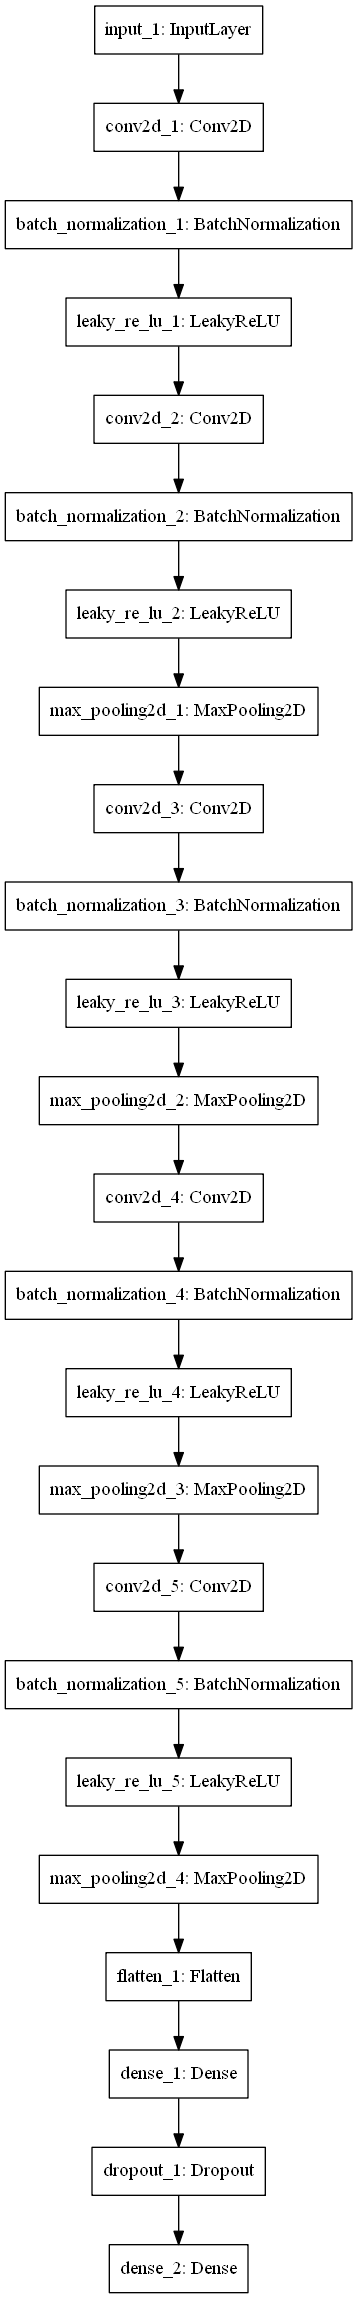

In [36]:
from tensorflow.keras.utils import plot_model     ##模型结构图
plot_model(model, 'd:\\h5\\model_3d.png')

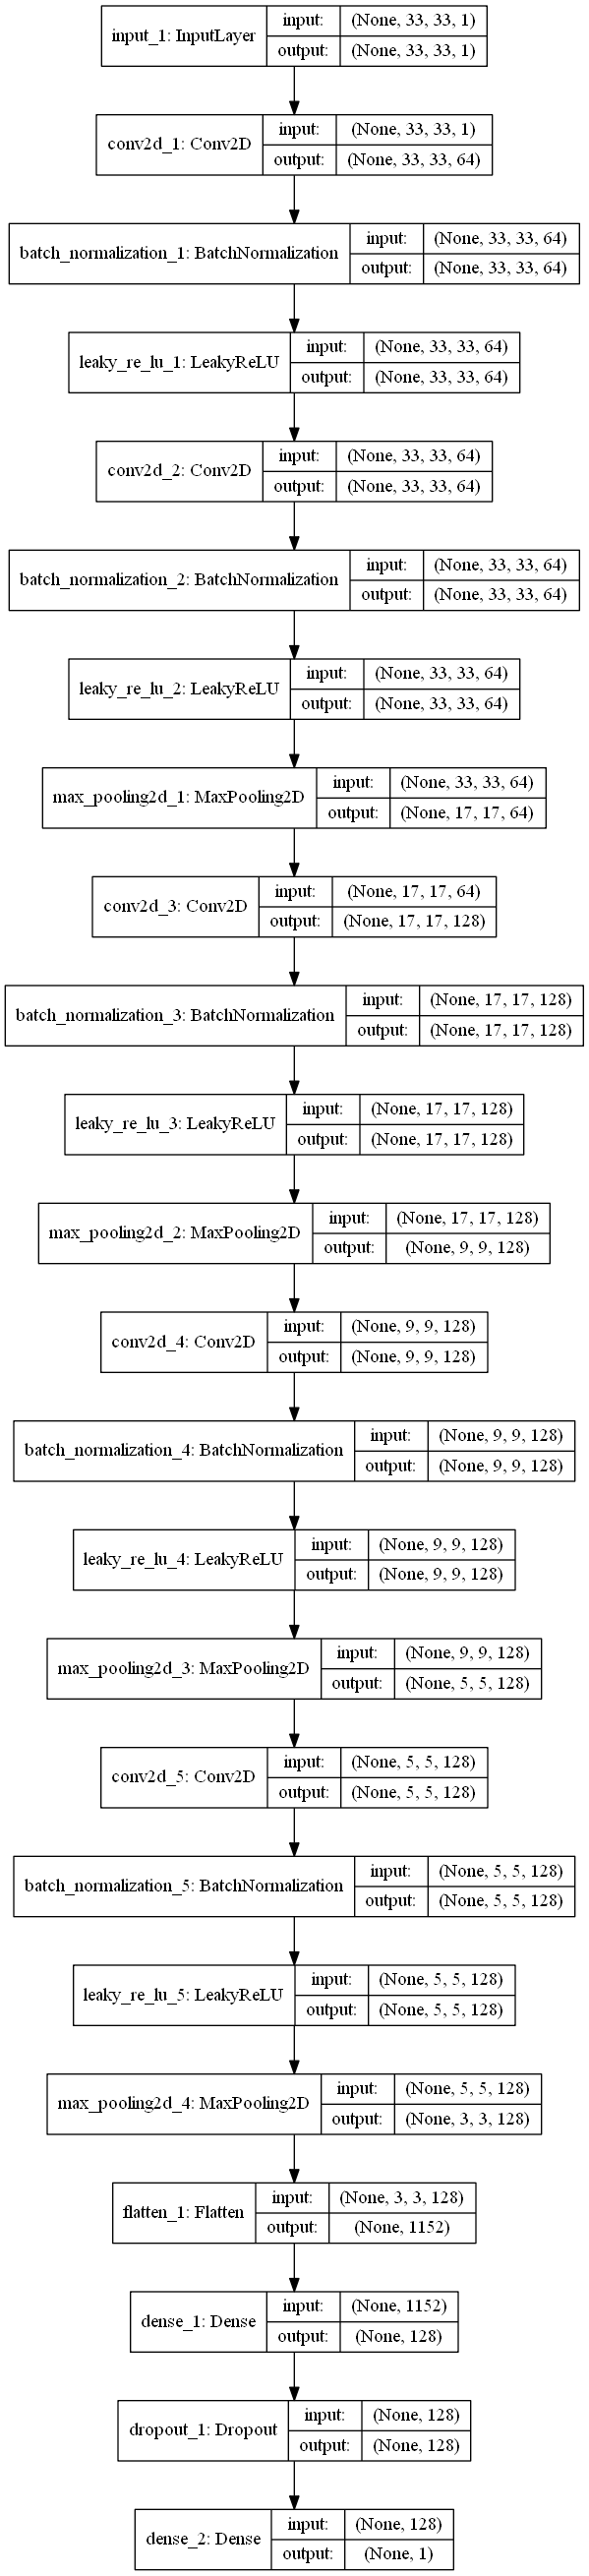

In [37]:
plot_model(model, 'd:\\h5\\model_3d.png',show_shapes=True)

In [38]:
from keras import backend as K
def f1(y_true, y_pred):
    def recall(y_true, y_pred):
        """Recall metric.

        Only computes a batch-wise average of recall.

        Computes the recall, a metric for multi-label classification of
        how many relevant items are selected.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
        recall = true_positives / (possible_positives + K.epsilon())
        return recall

    def precision(y_true, y_pred):
        """Precision metric.

        Only computes a batch-wise average of precision.

        Computes the precision, a metric for multi-label classification of
        how many selected items are relevant.
        """
        true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
        predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
        precision = true_positives / (predicted_positives + K.epsilon())
        return precision
    precision = precision(y_true, y_pred)
    recall = recall(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

In [39]:
import tensorflow as tf
from tensorflow.keras import backend as K

# AUC for a binary classifier
def auc(y_true, y_pred):
    ptas = tf.stack([binary_PTA(y_true,y_pred,k) for k in np.linspace(0, 1, 1000)],axis=0)
    pfas = tf.stack([binary_PFA(y_true,y_pred,k) for k in np.linspace(0, 1, 1000)],axis=0)
    pfas = tf.concat([tf.ones((1,)) ,pfas],axis=0)
    binSizes = -(pfas[1:]-pfas[:-1])
    s = ptas*binSizes
    return K.sum(s, axis=0)
# PFA, prob false alert for binary classifier
def binary_PFA(y_true, y_pred, threshold=K.variable(value=0.5)):
    y_pred = K.cast(y_pred >= threshold, 'float32')
    # N = total number of negative labels
    N = K.sum(1 - y_true)
    # FP = total number of false alerts, alerts from the negative class labels
    FP = K.sum(y_pred - y_pred * y_true)
    return FP/N
# P_TA prob true alerts for binary classifier
def binary_PTA(y_true, y_pred, threshold=K.variable(value=0.5)):
    y_pred = K.cast(y_pred >= threshold, 'float32')
    # P = total number of positive labels
    P = K.sum(y_true)
    # TP = total number of correct alerts, alerts from the positive class labels
    TP = K.sum(y_pred * y_true)
    return TP/P


In [40]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.Adam(lr=1e-4),#
              metrics=['acc']
              #metrics=['acc','Precision','Recall'] 
             )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [41]:
X_traingan = np.vstack((X_train,img0,img1))
X_traingan.shape

(1084, 33, 33, 1)

In [42]:
y_traingan = np.concatenate((y_train,lab0,lab1))

In [44]:
his = model.fit(X_traingan,y_traingan,epochs=100,batch_size=64,validation_data=(X_test, y_test),callbacks = callbacks_list)#,callbacks = callbacks_list,validation_split=0.25
#his = model.fit(X_train,y_train,epochs=100,batch_size=64,validation_data=(X_test, y_test))

Train on 1084 samples, validate on 84 samples
Epoch 1/100
1084/1084 [==============================] - 4s 4ms/step - loss: 0.6377 - acc: 0.7205 - val_loss: 0.7093 - val_acc: 0.5119
Epoch 2/100
1084/1084 [==============================] - 2s 2ms/step - loss: 0.3787 - acc: 0.8266 - val_loss: 0.6913 - val_acc: 0.5595
Epoch 3/100
1084/1084 [==============================] - 2s 2ms/step - loss: 0.2141 - acc: 0.9271 - val_loss: 0.6936 - val_acc: 0.4881
Epoch 4/100
1084/1084 [==============================] - 2s 2ms/step - loss: 0.1217 - acc: 0.9668 - val_loss: 0.6955 - val_acc: 0.4881
Epoch 5/100
1084/1084 [==============================] - 2s 2ms/step - loss: 0.0738 - acc: 0.9825 - val_loss: 0.6905 - val_acc: 0.4881
Epoch 6/100
1084/1084 [==============================] - 2s 2ms/step - loss: 0.0736 - acc: 0.9779 - val_loss: 0.6944 - val_acc: 0.4881
Epoch 7/100
1084/1084 [==============================] - 2s 2ms/step - loss: 0.0350 - acc: 0.9926 - val_loss: 0.6860 - val_acc: 0.5000
Epoch 8/1

In [45]:
test_loss,test_acc= model.evaluate(X_test,y_test)
print('test_acc:',test_acc)

84/84 [==============================] - 1s 13ms/step
test_acc: 0.738095223903656


In [46]:
from keras.models import load_model
model1 = load_model('E:/data/Survival/H5map/fmap/r_STAD.h5')

In [47]:
test_loss,test_acc= model1.evaluate(X_test,y_test)
print('test_acc:',test_acc)

84/84 [==============================] - 0s 6ms/step
test_acc: 0.761904776096344


In [285]:
predict = model1.predict(X_test)
#predict=np.argmax(predict,axis=1)

In [288]:
result = np.round(predict)

In [289]:
result = result.reshape(127)
result.shape

(127,)

In [290]:
result

array([0., 0., 1., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0., 1.,
       0., 0., 1., 1., 0., 0., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0.,
       0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0., 1., 0., 0.,
       1., 0., 0., 1., 1., 0., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 0., 1., 0.], dtype=float32)

In [281]:
y_test.shape

(127,)

In [282]:
y_test

array([0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 1.,
       0., 0., 0., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 0., 0., 1.,
       0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1.,
       1., 0., 0., 1., 1., 0., 0., 0., 0., 1., 1., 1., 0., 0., 1., 0., 0.,
       1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 0., 0., 1., 0.,
       0., 1., 0., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 0., 1., 0.,
       1., 0., 1., 0., 1., 1., 1., 1.])

In [291]:
from sklearn.metrics import classification_report
print('查准率、查全率、F1值：')
print(classification_report(y_test,result,target_names=None))

查准率、查全率、F1值：
              precision    recall  f1-score   support

         0.0       0.76      0.85      0.80        65
         1.0       0.82      0.73      0.77        62

    accuracy                           0.79       127
   macro avg       0.79      0.79      0.79       127
weighted avg       0.79      0.79      0.79       127



In [51]:
model.save_weights('d:/h5/fmap_cf_weights.h5')